In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
os.listdir('data/neg')

['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt',
 'cv005_29357.txt',
 'cv006_17022.txt',
 'cv007_4992.txt',
 'cv008_29326.txt',
 'cv009_29417.txt',
 'cv010_29063.txt',
 'cv011_13044.txt',
 'cv012_29411.txt',
 'cv013_10494.txt',
 'cv014_15600.txt',
 'cv015_29356.txt',
 'cv016_4348.txt',
 'cv017_23487.txt',
 'cv018_21672.txt',
 'cv019_16117.txt',
 'cv020_9234.txt',
 'cv021_17313.txt',
 'cv022_14227.txt',
 'cv023_13847.txt',
 'cv024_7033.txt',
 'cv025_29825.txt',
 'cv026_29229.txt',
 'cv027_26270.txt',
 'cv028_26964.txt',
 'cv029_19943.txt',
 'cv030_22893.txt',
 'cv031_19540.txt',
 'cv032_23718.txt',
 'cv033_25680.txt',
 'cv034_29446.txt',
 'cv035_3343.txt',
 'cv036_18385.txt',
 'cv037_19798.txt',
 'cv038_9781.txt',
 'cv039_5963.txt',
 'cv040_8829.txt',
 'cv041_22364.txt',
 'cv042_11927.txt',
 'cv043_16808.txt',
 'cv044_18429.txt',
 'cv045_25077.txt',
 'cv046_10613.txt',
 'cv047_18725.txt',
 'cv048_18380.txt',
 'cv049_21917.txt',
 'cv050_

In [3]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [4]:
stop_words = stopwords.words('english')

In [5]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [6]:
max_len_negative

1400

In [7]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [8]:
max_len_positive

1693

In [9]:
max_len = max(max_len_negative, max_len_positive)

In [10]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [11]:
X_train = negative_documents[:800] + positive_documents[:800]

In [12]:
len(X_train)

1600

In [13]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [14]:
len(y_train)

1600

In [15]:
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [16]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [18]:
max_len

1693

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [20]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [21]:
tokenizer

In [22]:
vocab_len = len(tokenizer.word_index) + 1

In [23]:
vocab_len

40527

In [24]:
encoded = tokenizer.texts_to_sequences(X_train)

In [25]:
encoded[0]

[7928,
 2526,
 887,
 18247,
 74,
 31,
 1643,
 243,
 15082,
 1229,
 12952,
 11363,
 12953,
 373,
 18248,
 1006,
 15082,
 1229,
 12954,
 11364,
 12955,
 373,
 11365,
 1592,
 1676,
 15082,
 43,
 342,
 184,
 106,
 1038,
 33,
 200,
 232,
 5526,
 81,
 127,
 682,
 742,
 2983,
 1676,
 16,
 2464,
 12,
 512,
 9322,
 15083,
 9323,
 7383,
 5527,
 4086,
 81,
 123,
 41,
 19,
 194,
 74,
 31,
 1643,
 17,
 1,
 313,
 10,
 7929,
 67,
 2004,
 406,
 23843,
 15084,
 402,
 723,
 18249,
 11,
 217,
 11363,
 11364,
 912,
 62,
 406,
 15084,
 9,
 63,
 31,
 239,
 86,
 724,
 820,
 1081,
 4612,
 464,
 12956,
 620,
 6152,
 2047,
 5528,
 226,
 6910,
 3,
 132,
 19,
 3440,
 2366,
 6910,
 20,
 19,
 967,
 1572,
 226,
 2419,
 6153,
 1082,
 7384,
 3,
 16,
 23844,
 5260,
 1133,
 934,
 6911,
 393,
 5528,
 3,
 2598,
 12957,
 273,
 6489,
 249,
 1230,
 1327,
 291,
 23845,
 2527,
 5832,
 23846,
 3441,
 15085,
 3535,
 71,
 410,
 31,
 600,
 165,
 49,
 1525,
 3442,
 15086,
 6489,
 294,
 410,
 18250,
 5833,
 239,
 240,
 189,
 16,
 25

In [26]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [27]:
padded.shape

(1600, 1693)

In [28]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [29]:
model = Model(inputs=[input1], outputs=output)

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding (Embedding)       (None, 1693, 100)         4052700   
                                                                 
 conv1d (Conv1D)             (None, 1690, 32)          12832     
                                                                 
 dropout (Dropout)           (None, 1690, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 845, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 27040)             0         
                                                             

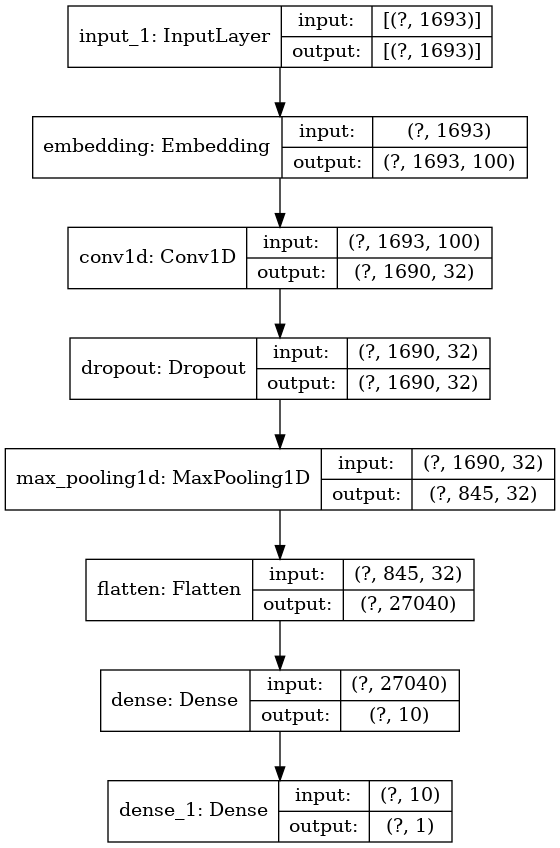

In [38]:
plot_model(model, show_shapes=True)

In [32]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [33]:
padded_test.shape

(400, 1693)

In [34]:
import numpy as np

In [35]:
model.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
80/80 [==============================] - 6s 63ms/step - loss: 0.6938 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 6s 75ms/step - loss: 0.6932 - accuracy: 0.4712 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
80/80 [==============================] - 6s 77ms/step - loss: 0.6900 - accuracy: 0.5400 - val_loss: 0.6846 - val_accuracy: 0.5600
Epoch 4/10
80/80 [==============================] - 5s 69ms/step - loss: 0.6045 - accuracy: 0.6687 - val_loss: 0.5239 - val_accuracy: 0.7475
Epoch 5/10
80/80 [==============================] - 6s 69ms/step - loss: 0.0850 - accuracy: 0.9775 - val_loss: 0.4376 - val_accuracy: 0.7925
Epoch 6/10
80/80 [==============================] - 5s 61ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3657 - val_accuracy: 0.8475
Epoch 7/10
80/80 [==============================] - 5s 59ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3667 - val_accuracy: 0.8475
Epoch 8/10
80

In [36]:
model.save('textcnn.h5')

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model = load_model('textcnn.h5')

In [39]:
with open('tokenizer.h5', 'rb') as f:
    tokenizer = pickle.load(f)

In [40]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'one': 3,
 'movie': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'would': 8,
 'time': 9,
 'story': 10,
 'also': 11,
 'much': 12,
 'character': 13,
 'get': 14,
 'characters': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'little': 25,
 'life': 26,
 'plot': 27,
 'people': 28,
 'never': 29,
 'scene': 30,
 'man': 31,
 'bad': 32,
 'new': 33,
 'best': 34,
 'scenes': 35,
 'many': 36,
 'know': 37,
 'movies': 38,
 'great': 39,
 'director': 40,
 'another': 41,
 'love': 42,
 'action': 43,
 'go': 44,
 'us': 45,
 'still': 46,
 'end': 47,
 'seems': 48,
 'made': 49,
 'work': 50,
 'something': 51,
 'back': 52,
 'big': 53,
 'makes': 54,
 'however': 55,
 'world': 56,
 'every': 57,
 'though': 58,
 'enough': 59,
 'take': 60,
 'seen': 61,
 'better': 62,
 'around': 63,
 'audience': 64,
 'performance': 65,
 'going': 66,
 'real': 67,
 'role': 68,
 'gets': 69,
 'years': 70,
 'john': 71,
 'think': 72,
 'funny': 73,
 

In [42]:
text = """
moviemaking is a lot like being the general manager of an nfl team in the post-salary cap era -- you've got to know how to allocate your resources . 
every dollar spent on a free-agent defensive tackle is one less dollar than you can spend on linebackers or safeties or centers . 
in the nfl , this leads to teams like the detroit lions , who boast a superstar running back with a huge contract , but can only field five guys named herb to block for him . 
in the movies , you end up with films like " spawn " , with a huge special-effects budget but not enough money to hire any recognizable actors . 
jackie chan is the barry sanders of moviemaking . 
he spins and darts across the screen like sanders cutting back through the defensive line . 
watching jackie in operation condor as he drives his motorcycle through the crowded streets of madrid , fleeing an armada of pursuers in identical black compact cars , is reminiscent of sanders running for daylight with the chicago bears in hot pursuit , except that sanders doesn't have to worry about rescuing runaway baby carriages . 
but like the lions star , jackie doesn't have anybody to block for him . 
almost every cent that's invested in a jackie chan movie goes for stunts , and as chan does his own stunts , the rest of the money goes to pay his hospital bills . 
this leaves about 75 cents to pay for things like directors ( chan directs ) , scripts and dubbing and supporting characters , not to mention the hideous title sequence . 
this also explains why the movie was shot in odd places like morocco and spain . 
 ( chan's first release in this country , " rumble in the bronx " , was supposedly set in new york , but was filmed in vancouver , and in the chase scenes the canadian rockies are clearly visible . ) 
heck , jackie doesn't even have enough money for a haircut , looks like , much less a personal hairstylist . 
in condor , chan plays the same character he's always played , himself , a mixture of bruce lee and tim allen , a master of both kung-fu and slapstick-fu . 
jackie is sent by the un to retrieve a cache of lost nazi gold in the north african desert , and is chased by a horde of neo-nazi sympathizers and two stereotypical arabs ( one of the things i like about jackie chan movies : no political correctness ) . 
he is joined by three women , who have little to do except scream , " jackie , save us ! " , and misuse firearms . 
the villain is an old nazi whose legs were broken in the secret base so that he has to be carried everywhere , and he's more pathetic than evil . 
en route , we have an extended motorcycle chase scene , a hilarious fight in the moroccan version of motel 6 with the neo-nazis , and two confrontations with savage natives . 
once at the secret desert base , there is a long chop-socky sequence , followed by the film's centerpiece , a wind-tunnel fight that's even better than the one in face/off . 
this is where the money was spent , on well-choreographed kung-fu sequences , on giant kevlar hamster balls , on smashed-up crates of bananas , and on scorpions . 
ignore the gaping holes in the plot ( how , exactly , if the villain's legs were broken , did he escape from the secret nazi base , and why didn't he take the key with him ? ) . 
don't worry about the production values , or what , exactly , the japanese girl was doing hitchhiking across the sahara . 
just go see the movie . 
operation condor has pretentions of being a " raiders of the lost ark " knockoff , but one wonders what jackie could do with the raiders franchise blocking for him -- with a lawrence kazdan screenplay , a john williams score , spielberg directing and george lucas producing , condor might be an a+ movie . 
however , you've got to go with what you've got , and what you've got in jackie chan is something special -- a talent that mainstream hollywood should , could , and ought to utilize .
"""

In [43]:
tokens = word_tokenize(text)
translator = str.maketrans('', '', punctuation)
tokens = [w.translate(translator) for w in tokens]
tokens = [w for w in tokens if not w in stop_words]
text = ' '.join(tokens)

In [44]:
text

'moviemaking lot like general manager nfl team postsalary cap era  got know allocate resources  every dollar spent freeagent defensive tackle one less dollar spend linebackers safeties centers  nfl  leads teams like detroit lions  boast superstar running back huge contract  field five guys named herb block  movies  end films like  spawn   huge specialeffects budget enough money hire recognizable actors  jackie chan barry sanders moviemaking  spins darts across screen like sanders cutting back defensive line  watching jackie operation condor drives motorcycle crowded streets madrid  fleeing armada pursuers identical black compact cars  reminiscent sanders running daylight chicago bears hot pursuit  except sanders nt worry rescuing runaway baby carriages  like lions star  jackie nt anybody block  almost every cent invested jackie chan movie goes stunts  chan stunts  rest money goes pay hospital bills  leaves 75 cents pay things like directors  chan directs   scripts dubbing supporting ch

In [46]:
text = tokenizer.texts_to_sequences([text])[0]
text

[5373,
 110,
 5,
 603,
 3000,
 10963,
 347,
 38910,
 7728,
 1688,
 166,
 37,
 38911,
 4617,
 57,
 2720,
 809,
 38912,
 14935,
 7322,
 3,
 181,
 2720,
 795,
 38913,
 38914,
 3822,
 10963,
 430,
 4927,
 5,
 5085,
 6189,
 6556,
 7449,
 309,
 52,
 702,
 6017,
 1536,
 468,
 400,
 273,
 38915,
 2610,
 38,
 47,
 24,
 5,
 1771,
 702,
 14346,
 1001,
 59,
 165,
 4042,
 5690,
 102,
 392,
 856,
 1679,
 8749,
 5373,
 9937,
 38916,
 467,
 117,
 5,
 8749,
 2699,
 52,
 14935,
 200,
 174,
 392,
 2569,
 6865,
 2812,
 7215,
 11296,
 1618,
 38917,
 6117,
 38918,
 9824,
 6288,
 156,
 14269,
 2039,
 2028,
 8749,
 309,
 3720,
 2073,
 3651,
 1186,
 3855,
 485,
 8749,
 2,
 3371,
 9072,
 6199,
 1055,
 38919,
 5,
 6189,
 109,
 392,
 2,
 2903,
 2610,
 84,
 57,
 22103,
 6650,
 392,
 856,
 4,
 113,
 2217,
 856,
 2217,
 196,
 165,
 113,
 740,
 1756,
 7797,
 650,
 11653,
 10333,
 740,
 77,
 5,
 1137,
 856,
 3102,
 3503,
 6594,
 385,
 15,
 1086,
 5129,
 363,
 258,
 11,
 1790,
 4,
 302,
 1310,
 1332,
 5,
 23725,
 6270,

In [48]:
text = pad_sequences([text], maxlen=max_len, padding='post')
text

array([[5373,  110,    5, ...,    0,    0,    0]])

In [50]:
model.predict(text)

1/1 [==============================] - 0s 23ms/step


array([[0.99936706]], dtype=float32)

In [51]:
pred = model.predict(text)
if float(pred) > 0.5:
    print('Positive')
else:
    print('Negative')

1/1 [==============================] - 0s 18ms/step
Positive


In [52]:
# MasoudKaviani.ir